In [1]:
import numpy as np
import pandas as pd
from array import array
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
%matplotlib inline
from matplotlib_venn import venn2
import seaborn as sns
import anndata as ad
import phagepy as pp
import scanpy as sc
import scipy.stats as ss
import scipy
import phagepy.analysis as analysis
import re
import os
from collections import Counter
import scipy.stats as stats
from Bio import SeqIO

In [2]:
# define output folder for figures
fig_dir='/path/to/output_figs/'

In [3]:
# define directory for source and output files
dir='/path/to/source_files/'

# Read/write

In [4]:
# load processed adata objects
## should be adata objects that have been subsetted to only include cohort-enriched peptides
subset_cbm_all = sc.read_h5ad(dir+'02_cbm_dshits.h5ad')
subset_bd_all = sc.read_h5ad(dir+'02_bd_dshits.h5ad')

In [5]:
# load chagas-specific peptide files
chagas_pept_cbm=pd.read_csv(dir+'01_cbm_pept.csv', index_col=0, header=0)
chagas_pept_bd=pd.read_csv(dir+'01_bd_pept.csv', index_col=0, header=0)

# Fig 2e and f; Fig 3a - single peptide plotting

In [6]:
# pull the z-scores for each enriched case peptide for each person with peptide names as column names and case/control status as index for easy plotting
rpk_pept_bd = pd.DataFrame(subset_bd_all.X, index=subset_bd_all.obs.group, columns=subset_bd_all.var_names)
rpk_pept_bd.head()

peptide,XP_816709.1_valyl-tRNA_synthetase_[Trypanosoma_cruzi_strain_CL_Brener]_frag33,XP_816709.1_valyl-tRNA_synthetase_[Trypanosoma_cruzi_strain_CL_Brener]_frag24,XP_816709.1_valyl-tRNA_synthetase_[Trypanosoma_cruzi_strain_CL_Brener]_frag22,XP_805528.1_tryptophanyl-tRNA_synthetase_[Trypanosoma_cruzi_strain_CL_Brener]_frag12,XP_811024.1_threonyl-tRNA_synthetase_[Trypanosoma_cruzi_strain_CL_Brener]_frag11,XP_815672.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag23,XP_805376.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag13,XP_815672.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag35,XP_807167.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag8,XP_815672.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag44,...,XP_814279.1_ubiquinone_biosynthesis_methyltransferase_[Trypanosoma_cruzi_strain_CL_Brener]_frag7,XP_813083.1_2-hydroxy-3-oxopropionate_reductase_[Trypanosoma_cruzi_strain_CL_Brener]_frag5,XP_814813.1_24-dienoyl-coa_reductase_FADH1_[Trypanosoma_cruzi_strain_CL_Brener]_frag6,XP_805283.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag1,XP_803963.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag9,XP_807701.1_10_kDa_heat_shock_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag1,XP_805326.1_phosphatidylinositol-kinase_domain_protein_partial_[Trypanosoma_cruzi_strain_CL_Brener]_frag2,XP_810266.1_phospholipase_A2-like_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag3,XP_810266.1_phospholipase_A2-like_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag12,XP_803976.1_1-acyl-sn-glycerol-3-phosphate_acyltransferase_partial_[Trypanosoma_cruzi_strain_CL_Brener]_frag7
group,,,,,,,,,,,,,,,,,,,,,
seropositive,1.000000,1.000000,1.339491,1.000000,2.086373,1.475288,3.104847,1.203695,1.339491,1.339491,...,1.135797,1.339491,1.135797,1.000000,1.271593,1.000000,3.172745,1.000000,1.814780,1.000000
seronegative,1.000000,1.134435,1.067218,1.000000,1.604959,1.403306,1.873830,1.000000,1.000000,1.201653,...,1.604959,1.268871,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.067218,1.000000
seropositive,1.000000,1.070608,1.070608,1.000000,1.282431,1.000000,1.635469,1.423646,2.765193,1.353039,...,1.423646,1.564862,1.000000,1.000000,3.118231,1.070608,2.270939,1.000000,1.635469,1.000000
seropositive,1.272307,1.204230,1.000000,1.068077,2.769997,1.136154,2.633843,3.791149,1.748845,1.272307,...,1.000000,2.225383,1.068077,1.340384,1.340384,1.136154,3.246535,1.816922,3.110381,1.680768
seronegative,1.268403,1.000000,1.402604,1.000000,2.811717,1.402604,1.939409,1.536805,1.067101,1.000000,...,1.201302,1.872308,1.067101,1.067101,1.000000,1.335503,1.335503,1.201302,1.134201,1.134201


In [7]:
# pull the z-scores for each enriched case peptide for each person with peptide names as column names and case/control status as index for easy plotting
rpk_pept_cbm = pd.DataFrame(subset_cbm_all.X, index=subset_cbm_all.obs.group, columns=subset_cbm_all.var_names)
rpk_pept_cbm.head()

peptide,XP_811134.1_urocanate_hydratase_[Trypanosoma_cruzi_strain_CL_Brener]_frag11,XP_811134.1_urocanate_hydratase_[Trypanosoma_cruzi_strain_CL_Brener]_frag17,XP_811134.1_urocanate_hydratase_[Trypanosoma_cruzi_strain_CL_Brener]_frag20,XP_807000.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag3,XP_806291.1_thymidine_kinase_[Trypanosoma_cruzi_strain_CL_Brener]_frag2,XP_811024.1_threonyl-tRNA_synthetase_[Trypanosoma_cruzi_strain_CL_Brener]_frag29,XP_811024.1_threonyl-tRNA_synthetase_[Trypanosoma_cruzi_strain_CL_Brener]_frag11,XP_808921.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag8,XP_809720.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag3,XP_815672.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag33,...,XP_814449.1_3'a2rel-related_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag1,XP_804306.1_25_kDa_translation_elongation_factor_1-beta_[Trypanosoma_cruzi_strain_CL_Brener]_frag4,XP_815263.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag5,XP_808139.1_2-oxoisovalerate_dehydrogenase_alpha_subunit_[Trypanosoma_cruzi_strain_CL_Brener]_frag5,XP_812092.1_2-oxoisovalerate_dehydrogenase_beta_subunit_mitochondrial_precursor_[Trypanosoma_cruzi_strain_CL2,XP_819609.1_24-dienoyl-coa_reductase-like_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag25,XP_818256.1_phosphotransferase_[Trypanosoma_cruzi_strain_CL_Brener]_frag10,XP_803963.1_hypothetical_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag7,XP_807701.1_10_kDa_heat_shock_protein_[Trypanosoma_cruzi_strain_CL_Brener]_frag1,XP_805326.1_phosphatidylinositol-kinase_domain_protein_partial_[Trypanosoma_cruzi_strain_CL_Brener]_frag8
group,,,,,,,,,,,,,,,,,,,,,
seropositive,1.078960,1.000000,1.078960,1.315842,1.078960,1.078960,4.553220,1.078960,1.473763,1.078960,...,1.000000,1.394802,1.078960,1.315842,1.789604,5.342824,5.026982,1.0,1.078960,1.000000
seropositive,1.000000,1.000000,1.000000,1.368687,1.000000,1.000000,1.294950,1.000000,1.147475,1.073738,...,1.000000,1.000000,1.294950,1.368687,2.032324,1.073738,1.147475,1.0,1.516162,1.000000
seropositive,1.000000,1.000000,1.000000,1.369131,1.000000,1.516783,1.147652,1.000000,3.140959,1.000000,...,1.369131,1.073826,1.000000,1.000000,1.295305,1.000000,15.174627,1.0,1.000000,1.073826
seropositive,1.153591,1.076795,1.383976,1.537567,1.307181,1.000000,1.614362,1.000000,1.076795,1.000000,...,1.076795,2.228725,1.076795,1.000000,1.000000,1.383976,1.767953,1.0,1.076795,1.000000
seropositive,1.079849,1.159699,1.399247,1.000000,1.159699,1.000000,5.072321,1.159699,3.395483,1.000000,...,1.159699,1.239548,1.079849,1.079849,1.000000,5.870816,1.399247,1.0,7.068557,1.159699


In [8]:
def raw_rpk_from_z(ad, ctrl_key, ctrl_value, var_name, z_score=5):
    """
    Calculate the raw rpk corresponding to a given z-score for a specific var_name - will use this for plotting

    Parameters:
    -----------
    ad : AnnData
        The AnnData object containing the data
    crtl_key: str
        column of ad.obs that specifies groups, one of which would be control. 
        (eg, ctrl_key=`group`; ad.obs[`group`])
    ctrl_value: str
        category within ad.obs[`ctrl_key`] that is the control group. 
        (eg, ctrl_key=`group`, ctrl_value=`healthy`; ad.obs[`group`]==`healthy`)
    var_name : str
        The name of the variable for which the raw value is being calculated.
    z_score : float, optional
        The z-score to use for calculating the raw value (default is 5).

    Returns:
    --------
    None
    
    """
    # Extract the raw expression values for the given var_name across all observations
    ctrl_grp = ad[ad.obs[ctrl_key].isin([ctrl_value]), :]
    
    raw_values = ctrl_grp[:, var_name].X
    
    # Compute the mean and standard deviation of those values
    mean = raw_values.mean()
    std = raw_values.std()
    
    # Calculate the raw rpk corresponding to the given z-score
    raw_rpk = z_score * std + mean
    
    return raw_rpk

In [9]:
# test function
var_name = 'XP_804569.1_trans-sialidase_partial_[Trypanosoma_cruzi_strain_CL_Brener]_frag23'
raw_rpk_from_z(subset_bd_all, 'group', 'seronegative', var_name,  z_score=5)

np.float32(3.3162675)

In [10]:
# test that self-calculation also gives same number
bd_seroneg = subset_bd_all[subset_bd_all.obs['group'].isin(['seronegative']), :]
raw_values = bd_seroneg[:, var_name].X

mean = raw_values.mean()
std = raw_values.std()

5 * std + mean

np.float32(3.3162675)

## Peptide list

In [11]:
pept_ids_to_plot = {
    'SA_f11' : "XP_813516.1_surface_antigen_2_(CA-2)_[Trypanosoma_cruzi_strain_CL_Brener]_frag11",
    'TS_f2' : "XP_817098.1_trans-sialidase_partial_[Trypanosoma_cruzi_strain_CL_Brener]_frag2",
    '60S_f1' : "XP_820993.1_60S_ribosomal_protein_L23a_[Trypanosoma_cruzi_strain_CL_Brener]_frag1"
}

## Plot

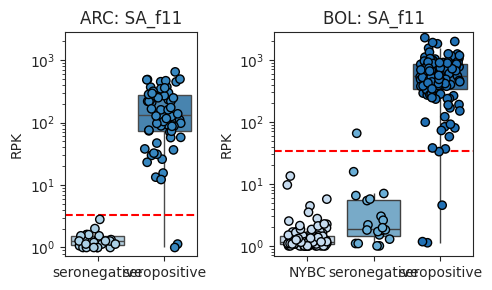

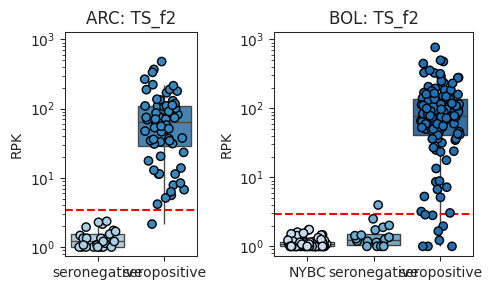

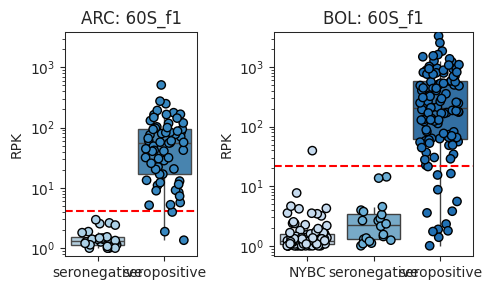

In [12]:
# loop through the dictionary to create a plot for each peptide
for peptide_name, peptide in pept_ids_to_plot.items():
    
    # set style and color palette
    sns.set_style('ticks')
    palette_bd = sns.color_palette("Blues", n_colors=2)
    palette_cbm = sns.color_palette("Blues", n_colors=3)
    order_bd = ['seronegative', 'seropositive']
    order_cbm = ['NYBC', 'seronegative', 'seropositive']

    # calculate raw RPK from z-score for both datasets - will plot as threshold
    line_bd = raw_rpk_from_z(subset_bd_all, 'group', 'seronegative', peptide, z_score=5)
    line_cbm = raw_rpk_from_z(subset_cbm_all, 'sero', 'seronegative', peptide, z_score=5)

    # determine the common y-axis limits (min and max across both datasets)
    max_value = max(rpk_pept_bd[peptide].max(), rpk_pept_cbm[peptide].max()) + 500

    # create two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(5, 3), gridspec_kw={'width_ratios': [2, 3]})

    # plot BD on the first axis
    ax1 = sns.boxplot(
    ax=axes[0], 
    data=rpk_pept_bd, 
    x=rpk_pept_bd.index, 
    y=peptide, 
    order=order_bd, 
    showcaps=False,
    showfliers=False, 
    palette=palette_bd, 
    linewidth=1,
    hue = rpk_pept_bd.index
    )

    # overlay stripplot
    sns.stripplot(
    ax=axes[0], 
    data=rpk_pept_bd, 
    x=rpk_pept_bd.index, 
    y=peptide, 
    order=order_bd,
    size=6, 
    palette=palette_bd, 
    edgecolor='black',
    linewidth=1, 
    jitter=0.3,
    hue = rpk_pept_bd.index
    )

    ax1.axhline(y=line_bd, color='red', linestyle='--')
    ax1.set_yscale('log')
    ax1.set_ylim(top=max_value)
    ax1.set_xlabel("")
    ax1.set_ylabel("RPK")
    ax1.set_title(f"ARC: {peptide_name}")

    # plot CBM on the second axis
    ax2 = sns.boxplot(
    ax=axes[1], 
    data=rpk_pept_cbm, 
    x=rpk_pept_cbm.index, 
    y=peptide, 
    order=order_cbm, 
    showcaps=False,
    showfliers=False, 
    palette=palette_cbm, 
    linewidth=1,
    hue = rpk_pept_cbm.index
    )

    # overlay stripplot
    sns.stripplot(
    ax=axes[1], 
    data=rpk_pept_cbm, 
    x=rpk_pept_cbm.index, 
    y=peptide, 
    order=order_cbm,
    size=6, 
    palette=palette_cbm, 
    edgecolor='black',
    linewidth=1, 
    jitter=0.3,
    hue = rpk_pept_cbm.index
    )

    ax2.axhline(y=line_cbm, color='red', linestyle='--')
    ax2.set_yscale('log')
    ax2.set_ylim(top=max_value)
    ax2.set_xlabel("")
    ax2.set_ylabel("RPK")
    ax2.set_title(f"BOL: {peptide_name}")

    # Set additional plot parameters
    plt.rcParams['axes.linewidth'] = .75

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the plot with the peptide_name in the filename
    plt.savefig(fig_dir+f"{peptide_name}_logrpk_both_box.pdf", dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()